In [26]:
import pandas as pd
import math
import matplotlib as mpl
#mpl.use('pdf')
import matplotlib.pyplot as plt
import numpy as np
from collections import OrderedDict
import matplotlib
import seaborn as sns
#Red
red1= sns.color_palette("Reds_d",1)
red2= sns.color_palette("Reds_d",2)
red3= sns.color_palette("Reds_d",3)
red4= sns.color_palette("Reds_d",4)
red5= sns.color_palette("Reds_d",5)
red6= sns.color_palette("Reds_d",6)
red7= sns.color_palette("Reds_d",7)
red8= sns.color_palette("Reds_d",8)

#YellowGreen
yg1= sns.color_palette("YlGn_d",1)
yg2= sns.color_palette("YlGn_d",2)
yg3= sns.color_palette("YlGn_d",3)
yg4= sns.color_palette("YlGn_d",4)
yg5= sns.color_palette("YlGn_d",5)
yg7= sns.color_palette("YlGn_d",7)

#GreenBlue
gb1= sns.color_palette("GnBu_d",1)
gb2= sns.color_palette("GnBu_d",2)
gb3= sns.color_palette("GnBu_d",3)
gb4= sns.color_palette("GnBu_d",4)
gb5= sns.color_palette("GnBu_d",5)
gb6= sns.color_palette("GnBu_d",6)
gb7= sns.color_palette("GnBu_d",7)
gb8= sns.color_palette("GnBu_d",8)

cp2 = list(map(lambda x: sns.desaturate(x,0.9),[red7[2],gb7[4]]))
cp2v1 = list(map(lambda x: sns.desaturate(x,0.9),[red7[2],yg7[0]]))
cp3 = list(map(lambda x: sns.desaturate(x,0.9),[yg7[0],gb7[4],red7[2]]))
cp4 = list(map(lambda x: sns.desaturate(x,0.9),[yg7[0],red7[2], yg7[5],gb7[4]]))
cp2_2 = list(map(lambda x: sns.desaturate(x,0.9),[red7[0],red7[3],yg7[1],gb7[4]]))
cp3_2 = list(map(lambda x: sns.desaturate(x,0.9),[red7[5],red7[0],red7[3],yg7[1],gb7[4]]))
cp_total_spectrum = list(map(lambda x: sns.desaturate(x,0.9),gb7 + yg7 + red7))

In [27]:
sns.set_palette(cp3)
sns.color_palette()

[(0.6120315263360248, 0.8081330257593233, 0.5357962322183778),
 (0.2649160579264386, 0.5270152505446624, 0.6269460463924131),
 (0.8807358708189157, 0.32277047289504046, 0.2744659746251443)]

In [28]:
sns.set_palette(cp2v1)
sns.color_palette()

[(0.8807358708189157, 0.32277047289504046, 0.2744659746251443),
 (0.6120315263360248, 0.8081330257593233, 0.5357962322183778)]

In [29]:
sns.set_palette(cp4)
sns.color_palette()

[(0.6120315263360248, 0.8081330257593233, 0.5357962322183778),
 (0.8807358708189157, 0.32277047289504046, 0.2744659746251443),
 (0.21773010380622843, 0.39735640138408307, 0.268885813148789),
 (0.2649160579264386, 0.5270152505446624, 0.6269460463924131)]

In [30]:
sns.set_palette(cp3_2)
sns.color_palette()

[(0.5228235294117647, 0.2094948096885813, 0.1949619377162629),
 (0.9364108676150199, 0.5331674996796103, 0.44647776496219393),
 (0.850771241830065, 0.21914033064206087, 0.18984390618992708),
 (0.4879192618223761, 0.7401222606689734, 0.4719192618223761),
 (0.2649160579264386, 0.5270152505446624, 0.6269460463924131)]

In [31]:
sns.set_palette(cp2_2)
sns.color_palette()

[(0.9364108676150199, 0.5331674996796103, 0.44647776496219393),
 (0.850771241830065, 0.21914033064206087, 0.18984390618992708),
 (0.4879192618223761, 0.7401222606689734, 0.4719192618223761),
 (0.2649160579264386, 0.5270152505446624, 0.6269460463924131)]

In [6]:
def CoCoPeLia_log_read(filename):
    temp = pd.read_csv(filename, header=None, names = ['T','dev_num', 'dev_id_token', 'cachesize_limit','TransA','TransB',
                                                    'alpha','beta','M','N','K','Asloc','Bsloc','Csloc', 'CsOutloc', 'timer'], 
                                                     dtype = {'M': np.int64, 'N': np.int64, 'K': np.int64, 'timer': np.float64} )
    temp.sort_values(by=['M','N','K'])
    return temp

def PARALia_log_read(filename):
    temp = pd.read_csv(filename, header=None, names = ['T','dev_num', 'dev_id_token', 'cachesize_limit','TransA','TransB',
                                                    'alpha','beta','M','N','K','Asloc','Bsloc','Csloc', 'CsOutloc', 'timer', 'pred_t', 'pred_J'], 
                                                     dtype = {'M': np.int64, 'N': np.int64, 'K': np.int64, 'timer': np.float64, 'pred_t': np.float64, 'pred_J': np.float64} )
    temp.sort_values(by=['M','N','K'])
    return temp

def keep_dev_num(num, dataframe):
    return dataframe[dataframe['dev_num'] == num]

    
devices=8
machine = 'vulcan'
Mmax = math.sqrt(32*1e9/(3*8))/256 #Tesla-V100
MemMax = 4*(1024*1024*1024)*devices # Questionable limit
Rmax_Gflops = 7*1024*devices
#Mmax = math.sqrt(11*1e9/(3*8))/256 #Tesla-K40
#machine = 'testbed-II_Tesla-V100'

version="1.4"
split="ST-2D-BLOCK-CYCLIC"
sr_over=""
implementation="_UN-PB-L4"
pw_optimize="_PW-PRED-PERF"
homedir = "~/mount_vulcan"

impl_hops=""
benchdir= homedir + "/PhD_stuff/CoCoPeLia-Framework-bench-Nohops"
cuBLASXt_best_data = CoCoPeLia_log_read('%s/%s-build/%s-install/Benchmarking/testLogs/cuBLASXtDgemmRunner_%s_%s%s%s%s_%s.log' %(benchdir, machine, machine, split, sr_over, implementation, impl_hops, pw_optimize, version))
print('cuBLASXt_best_data len: %d\n' % len(cuBLASXt_best_data))

impl_hops="_RONLY-HOPS-1-0.20"
benchdir= homedir + "/PhD_stuff/CoCoPeLia-Framework-bench-Rhops-0.2pen"
BLASxEx_data = CoCoPeLia_log_read('%s/%s-build/%s-install/Benchmarking/testLogs/BLASxExDgemmRunner_%s_%s%s%s%s_%s.log' %(benchdir, machine, machine, split, sr_over, implementation, impl_hops, pw_optimize, version))
print('BLASxEx_data len: %d\n' % len(BLASxEx_data))

impl_hops="_ALL-HOPS-1-0.20"
benchdir= homedir + "/PhD_stuff/CoCoPeLia-Framework-bench-Allhops-0.2pen"
XKBLAS_nocache_data = CoCoPeLia_log_read('%s/%s-build/%s-install/Benchmarking/testLogs/XKBLASDgemmRunner_%s_%s%s%s%s_%s.log' %(benchdir, machine, machine, split, sr_over, implementation, impl_hops, pw_optimize, version))
print('XKBLAS_nocache_data len: %d\n' % len(XKBLAS_nocache_data))


cuBLASXt_best_data len: 12500

BLASxEx_data len: 12500

XKBLAS_nocache_data len: 12420



In [7]:
version="1.5"
pw_optimize="_PW-PRED-PERF-PER-J-0.00"
benchdir= homedir + "/PhD_stuff/CoCoPeLia-Framework-predj-0"
CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0 = (PARALia_log_read('%s/%s-build/%s-install/Benchmarking/testLogs/CoCoPeLiaDgemmRunner_%s_%s%s%s%s_%s.log' 
                                                                  %(benchdir, machine, machine, split, sr_over, implementation, impl_hops, pw_optimize, version)))
print('CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0 len: %d\n' % len(CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0))


pw_optimize="_PW-PRED-PERF-PER-J-1.00"
benchdir= homedir + "/PhD_stuff/CoCoPeLia-Framework"
CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_1 = (PARALia_log_read('%s/%s-build/%s-install/Benchmarking/testLogs/CoCoPeLiaDgemmRunner_%s_%s%s%s%s_%s.log' 
                                                                  %(benchdir, machine, machine, split, sr_over, implementation, impl_hops, pw_optimize, version)))
print('CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_1 len: %d\n' % len(CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_1))


CoCopeLia_data_allhops_02pen_ESPA_alldev = keep_dev_num(8, PARALia_log_read('%s/%s-build/%s-install/Benchmarking/testLogs/CoCoPeLiaDgemmRunner_predefined_vals_%s_%s%s%s%s_%s.log' 
                                                                  %(benchdir, machine, machine, split, sr_over, implementation, impl_hops, pw_optimize, version)))
print('CoCopeLia_data_allhops_02pen_ESPA_alldev len: %d\n' % len(CoCopeLia_data_allhops_02pen_ESPA_alldev))

pw_optimize="_PW-PRED-PERF"
CoCopeLia_data_allhops_02pen_ESPA_predef_dev = PARALia_log_read('%s/%s-build/%s-install/Benchmarking/testLogs/CoCoPeLiaDgemmRunner_predefined_vals_%s_%s%s%s%s_%s.log' 
                                                                  %(benchdir, machine, machine, split, sr_over, implementation, impl_hops, pw_optimize, version))
print('NOT REALLY UPDATED to 1.5!!!! CoCopeLia_data_allhops_02pen_ESPA_predef_dev len: %d\n' % len(CoCopeLia_data_allhops_02pen_ESPA_predef_dev))


pw_optimize="_PW-PRED-PERF-PER-J-5.00"
benchdir= homedir + "/PhD_stuff/CoCoPeLia-Framework-predj-5"
CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_5 = (PARALia_log_read('%s/%s-build/%s-install/Benchmarking/testLogs/CoCoPeLiaDgemmRunner_%s_%s%s%s%s_%s.log' 
                                                                  %(benchdir, machine, machine, split, sr_over, implementation, impl_hops, pw_optimize, version)))
print('CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_5 len: %d\n' % len(CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_5))


pw_optimize="_PW-PRED-ENERGY-DELAY"
benchdir= homedir + "/PhD_stuff/CoCoPeLia-Framework"
CoCopeLia_data_allhops_02pen_ESPA_pred_EDP = (PARALia_log_read('%s/%s-build/%s-install/Benchmarking/testLogs/CoCoPeLiaDgemmRunner_%s_%s%s%s%s_%s.log' 
                                                                  %(benchdir, machine, machine, split, sr_over, implementation, impl_hops, pw_optimize, version)))
print('CoCopeLia_data_allhops_02pen_ESPA_pred_EDP len: %d\n' % len(CoCopeLia_data_allhops_02pen_ESPA_pred_EDP))

CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0 len: 67000

CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_1 len: 67000

CoCopeLia_data_allhops_02pen_ESPA_alldev len: 67000

NOT REALLY UPDATED to 1.5!!!! CoCopeLia_data_allhops_02pen_ESPA_predef_dev len: 154869

CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_5 len: 66900

CoCopeLia_data_allhops_02pen_ESPA_pred_EDP len: 66805



In [8]:
def CoCoPeLia_grouby_avg(df):
    result = df.groupby(['T','dev_num', 'dev_id_token', 'cachesize_limit','TransA','TransB',
        'alpha','beta','M','N','K','Asloc','Bsloc','Csloc', 'CsOutloc'], as_index=False, sort=True).mean()
    #print(result)
    return result
#CoCoPeLia_group = CoCoPeLia_grouby_list_avg(CoCopeLia_data)
#print(CoCoPeLia_plot_data)

def CoCoPeLia_modified_grouby_avg(df):
    result = df.groupby(['T','dev_num', 'dev_id_token', 'cachesize_limit','TransA','TransB',
        'alpha','beta','M','N','K','Asloc','Bsloc','Csloc', 'CsOutloc', 'flops', 'bytes', 'loc_str', 'imp'], as_index=False, sort=True).mean()
    #print(result)
    return result
#CoCoPeLia_group = CoCoPeLia_grouby_list_avg(CoCopeLia_data)
#print(CoCoPeLia_plot_data)

def CoCoPeLia_modified_grouby_max(df):
    result = df.groupby(['T','dev_num', 'dev_id_token', 'cachesize_limit','TransA','TransB',
        'alpha','beta','M','N','K','Asloc','Bsloc','Csloc', 'CsOutloc', 'flops', 'bytes', 'loc_str', 'imp'], as_index=False, sort=True).max()
    #print(result)
    return result

def CoCoPeLia_grouby_min(df):
    return df.groupby(['T','dev_num', 'dev_id_token', 'cachesize_limit','TransA','TransB',
        'alpha','beta','M','N','K','Asloc','Bsloc','Csloc', 'CsOutloc'], as_index=False, sort=True).min()

def CoCoPeLia_select_subset(df, subset_str):
    if subset_str == 'square': 
        return df.loc[(df['M'] == df['N']) & (df['M'] == df['K'])]
    elif subset_str == 'fat-thin':
        return df.loc[(df['M'] == df['N']) & (df['M'] > df['K'])]
    elif subset_str == 'thin-fat':        
        return df.loc[(df['M'] == df['N']) & (df['M'] < df['K'])]
    
def CoCoPeLia_select_indata_locs(df, loc1, loc2, loc3):
    return df.loc[(df['Asloc'] == loc1) & (df['Bsloc'] == loc2) & (df['Csloc'] == loc3) & (df['M'] == df['N']) & (df['M'] < df['K'])]

In [9]:
font=8
#plt.rc('font', family='serif', serif='Times') #annoying warning filling my view, so disabled until needed
#plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=font)
plt.rc('ytick', labelsize=font)
plt.rc('axes', labelsize=font)
plt.rc('figure', titlesize=font)
# width as measured in inkscape
width = 3.487
height = width / 1.618

#fig, ax = plt.subplots()
#fig.subplots_adjust(left=.15, bottom=.17, right=.99, top=.97)

In [10]:
def dgemm_flops(df):
    df['flops'] = df['M']*df['N']*(2*df['K'] + 2)
    return df['M']*df['N']*(2*df['K'] + 2)
def dgemm_bytes(df):
    df['bytes'] = 8*(df['M']*(df['N']+df['K']) + df['N']*df['K']) 
    return 8*(df['M']*(df['N']+df['K']) + df['N']*df['K']) 

In [11]:
    dev_W_avg = (CoCopeLia_data_allhops_02pen_ESPA_pred_EDP['pred_J']/CoCopeLia_data_allhops_02pen_ESPA_pred_EDP['pred_t']/CoCopeLia_data_allhops_02pen_ESPA_pred_EDP['dev_num']).mean()
    print(dev_W_avg)
    
    dgemm_bytes(cuBLASXt_best_data)
    dgemm_flops(cuBLASXt_best_data)
    cuBLASXt_best_data['pred_t'] = cuBLASXt_best_data['pred_J'] = 0
    cuBLASXt_best_data['perf'] = cuBLASXt_best_data['flops']/(1e9*cuBLASXt_best_data['timer'])
    cuBLASXt_best_data['energy'] = cuBLASXt_best_data['timer']*(dev_W_avg*8)
    cuBLASXt_best_data['EDP'] = cuBLASXt_best_data['perf']*cuBLASXt_best_data['perf']/(dev_W_avg*8)
    cuBLASXt_best_data['loc_str'] = 100*(cuBLASXt_best_data['Asloc']+1) + 10*(cuBLASXt_best_data['Bsloc']+1) + cuBLASXt_best_data['Csloc']+1
    cuBLASXt_best_data['imp'] = '0.cuBLASXt'
    print("cuBLASXt_best_data mean of %d cases -> perf = %lf Gflops/s, Energy = %lf J, EDP = %lf" % 
              (len(CoCoPeLia_modified_grouby_avg(cuBLASXt_best_data)), CoCoPeLia_modified_grouby_avg(cuBLASXt_best_data)['perf'].mean(), 
               CoCoPeLia_modified_grouby_avg(cuBLASXt_best_data)['energy'].mean(),  CoCoPeLia_modified_grouby_avg(cuBLASXt_best_data)['EDP'].mean()))
    
    dgemm_bytes(BLASxEx_data)
    dgemm_flops(BLASxEx_data)
    BLASxEx_data['pred_t'] = BLASxEx_data['pred_J'] = 0
    BLASxEx_data['perf'] = BLASxEx_data['flops']/(1e9*BLASxEx_data['timer'])
    BLASxEx_data['energy'] = BLASxEx_data['timer']*(dev_W_avg*8)
    BLASxEx_data['EDP'] = BLASxEx_data['perf']*BLASxEx_data['perf']/(dev_W_avg*8)
    BLASxEx_data['loc_str'] = 100*(BLASxEx_data['Asloc']+1) + 10*(BLASxEx_data['Bsloc']+1) + BLASxEx_data['Csloc']+1
    BLASxEx_data['imp'] = '1.BLASX'
    print("BLASxEx_data mean of %d cases -> perf = %lf Gflops/s Energy = %lf J, EDP = %lf" % 
          (len(CoCoPeLia_modified_grouby_avg(BLASxEx_data)), CoCoPeLia_modified_grouby_avg(BLASxEx_data)['perf'].mean(), 
           CoCoPeLia_modified_grouby_avg(BLASxEx_data)['energy'].mean(), CoCoPeLia_modified_grouby_avg(BLASxEx_data)['EDP'].mean() ))
    
    dgemm_bytes(XKBLAS_nocache_data)
    dgemm_flops(XKBLAS_nocache_data)
    XKBLAS_nocache_data['pred_t'] = XKBLAS_nocache_data['pred_J'] = 0
    XKBLAS_nocache_data['perf'] = XKBLAS_nocache_data['flops']/(1e9*XKBLAS_nocache_data['timer'])
    XKBLAS_nocache_data['energy'] = XKBLAS_nocache_data['timer']*(dev_W_avg*8)
    XKBLAS_nocache_data['EDP'] = XKBLAS_nocache_data['perf']*XKBLAS_nocache_data['perf']/(dev_W_avg*8)
    XKBLAS_nocache_data['loc_str'] = 100*(XKBLAS_nocache_data['Asloc']+1) + 10*(XKBLAS_nocache_data['Bsloc']+1) + XKBLAS_nocache_data['Csloc']+1
    XKBLAS_nocache_data['imp'] = '2.XKBLAS'
    print("XKBLAS_nocache_data mean of %d cases -> perf = %lf Gflops/s, Energy = %lf J, EDP = %lf" % 
          (len(CoCoPeLia_modified_grouby_avg(XKBLAS_nocache_data)), CoCoPeLia_modified_grouby_avg(XKBLAS_nocache_data)['perf'].mean(), 
           CoCoPeLia_modified_grouby_avg(XKBLAS_nocache_data)['energy'].mean(), CoCoPeLia_modified_grouby_avg(XKBLAS_nocache_data)['EDP'].mean()))
    
        
    dgemm_bytes(CoCopeLia_data_allhops_02pen_ESPA_alldev)
    dgemm_flops(CoCopeLia_data_allhops_02pen_ESPA_alldev)
    CoCopeLia_data_allhops_02pen_ESPA_alldev['perf'] = CoCopeLia_data_allhops_02pen_ESPA_alldev['flops']/(1e9*CoCopeLia_data_allhops_02pen_ESPA_alldev['timer'])
    CoCopeLia_data_allhops_02pen_ESPA_alldev['energy'] = CoCopeLia_data_allhops_02pen_ESPA_alldev['timer']*(dev_W_avg*CoCopeLia_data_allhops_02pen_ESPA_alldev['dev_num'])
    CoCopeLia_data_allhops_02pen_ESPA_alldev['EDP'] = CoCopeLia_data_allhops_02pen_ESPA_alldev['perf']*CoCopeLia_data_allhops_02pen_ESPA_alldev['perf']/(dev_W_avg*CoCopeLia_data_allhops_02pen_ESPA_alldev['dev_num'])    
    CoCopeLia_data_allhops_02pen_ESPA_alldev['loc_str'] = 100*(CoCopeLia_data_allhops_02pen_ESPA_alldev['Asloc']+1) + 10*(CoCopeLia_data_allhops_02pen_ESPA_alldev['Bsloc']+1) + CoCopeLia_data_allhops_02pen_ESPA_alldev['Csloc']+1
    CoCopeLia_data_allhops_02pen_ESPA_alldev['imp'] = '3.PARALia_1.5 AllDev'
    print("CoCopeLia_data_allhops_02pen_ESPA_alldev mean of %d cases -> perf = %lf Gflops/s, Energy = %lf J, EDP = %lf" % 
          (len(CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_alldev)), CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_alldev)['perf'].mean(), 
           CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_alldev)['energy'].mean(), CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_alldev)['EDP'].mean()))
    
    dgemm_bytes(CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0)
    dgemm_flops(CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0)
    CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0['perf'] = CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0['flops']/(1e9*CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0['timer'])
    CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0['energy'] = CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0['timer']*(dev_W_avg*CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0['dev_num'])
    CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0['EDP'] = CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0['perf']*CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0['perf']/(dev_W_avg*CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0['dev_num'])
    CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0['loc_str'] = 100*(CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0['Asloc']+1) + 10*(CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0['Bsloc']+1) + CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0['Csloc']+1
    CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0['imp'] = '4.PARALia_1.5 PPJ-0 (e.g. ~=PERF)'
    print("CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0 mean of %d cases -> perf = %lf Gflops/s, Energy = %lf J, EDP = %lf" % 
          (len(CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0)), CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0)['perf'].mean(), 
           CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0)['energy'].mean(), CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0)['EDP'].mean()))
   
    dgemm_bytes(CoCopeLia_data_allhops_02pen_ESPA_predef_dev)
    dgemm_flops(CoCopeLia_data_allhops_02pen_ESPA_predef_dev)
    CoCopeLia_data_allhops_02pen_ESPA_predef_dev['perf'] = CoCopeLia_data_allhops_02pen_ESPA_predef_dev['flops']/(1e9*CoCopeLia_data_allhops_02pen_ESPA_predef_dev['timer'])
    CoCopeLia_data_allhops_02pen_ESPA_predef_dev['energy'] = CoCopeLia_data_allhops_02pen_ESPA_predef_dev['timer']*(dev_W_avg*CoCopeLia_data_allhops_02pen_ESPA_predef_dev['dev_num'])
    CoCopeLia_data_allhops_02pen_ESPA_predef_dev['EDP'] = CoCopeLia_data_allhops_02pen_ESPA_predef_dev['perf']*CoCopeLia_data_allhops_02pen_ESPA_predef_dev['perf']/(dev_W_avg*CoCopeLia_data_allhops_02pen_ESPA_predef_dev['dev_num'])    
    CoCopeLia_data_allhops_02pen_ESPA_predef_dev['loc_str'] = 100*(CoCopeLia_data_allhops_02pen_ESPA_predef_dev['Asloc']+1) + 10*(CoCopeLia_data_allhops_02pen_ESPA_predef_dev['Bsloc']+1) + CoCopeLia_data_allhops_02pen_ESPA_predef_dev['Csloc']+1
    CoCopeLia_data_allhops_02pen_ESPA_predef_dev['imp'] = 'Predef_dev_dataset'
    #print("CoCopeLia_data_allhops_02pen_ESPA_predef_dev mean of %d cases -> perf = %lf Gflops/s, Energy = %lf J, EDP = %lf" % 
    #      (len(CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_predef_dev)), CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_predef_dev)['perf'].mean(), 
    #       CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_predef_dev)['energy'].mean(), CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_predef_dev)['EDP'].mean()))
    
    #CoCopeLia_data_allhops_02pen_ESPA_predef_dev_6_1 = CoCopeLia_data_allhops_02pen_ESPA_predef_dev[CoCopeLia_data_allhops_02pen_ESPA_predef_dev['dev_id_token'] == 11101110]
    #CoCopeLia_data_allhops_02pen_ESPA_predef_dev_6_1['imp'] = '6 dev (11101110)'
    #print("CoCopeLia_data_allhops_02pen_ESPA_predef_dev_6_1 mean of %d cases -> perf = %lf Gflops/s, Energy = %lf J, EDP = %lf" % 
    #    (len(CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_predef_dev_6_1)), CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_predef_dev_6_1)['perf'].mean(), 
    #    CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_predef_dev_6_1)['energy'].mean(), CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_predef_dev_6_1)['EDP'].mean())) 
 
    #CoCopeLia_data_allhops_02pen_ESPA_predef_dev_4_1 = CoCopeLia_data_allhops_02pen_ESPA_predef_dev[CoCopeLia_data_allhops_02pen_ESPA_predef_dev['dev_id_token'] == 11110000]
    #CoCopeLia_data_allhops_02pen_ESPA_predef_dev_4_1['imp'] = '4 dev (11110000)'
    #print("CoCopeLia_data_allhops_02pen_ESPA_predef_dev_4_1 mean of %d cases -> perf = %lf Gflops/s, Energy = %lf J, EDP = %lf" % 
    #    (len(CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_predef_dev_4_1)), CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_predef_dev_4_1)['perf'].mean(), 
    #    CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_predef_dev_4_1)['energy'].mean(), CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_predef_dev_4_1)['EDP'].mean())) 
    
    #CoCopeLia_data_allhops_02pen_ESPA_predef_dev_4_2 = CoCopeLia_data_allhops_02pen_ESPA_predef_dev[CoCopeLia_data_allhops_02pen_ESPA_predef_dev['dev_id_token'] == 1100110]
    #CoCopeLia_data_allhops_02pen_ESPA_predef_dev_4_2['imp'] = '4 dev (01100110)'
    #print("CoCopeLia_data_allhops_02pen_ESPA_predef_dev_4_2 mean of %d cases -> perf = %lf Gflops/s, Energy = %lf J, EDP = %lf" % 
    #    (len(CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_predef_dev_4_2)), CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_predef_dev_4_2)['perf'].mean(), 
    #    CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_predef_dev_4_2)['energy'].mean(), CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_predef_dev_4_2)['EDP'].mean())) 

    #CoCopeLia_data_allhops_02pen_ESPA_predef_dev_best = pd.concat([CoCopeLia_data_allhops_02pen_ESPA_predef_dev])
    #CoCopeLia_data_allhops_02pen_ESPA_predef_dev_best['dev_num'] = -1
    #CoCopeLia_data_allhops_02pen_ESPA_predef_dev_best['dev_id_token'] = -1
    #CoCopeLia_data_allhops_02pen_ESPA_predef_dev_best['imp'] = 'Best select'
    #CoCopeLia_data_allhops_02pen_ESPA_predef_dev_best = CoCoPeLia_modified_grouby_max(CoCopeLia_data_allhops_02pen_ESPA_predef_dev_best)
    #print("CoCopeLia_data_allhops_02pen_ESPA_predef_dev_best mean of %d cases -> perf = %lf Gflops/s, Energy = %lf J, EDP = %lf" % 
    #      (len(CoCopeLia_data_allhops_02pen_ESPA_predef_dev_best), CoCopeLia_data_allhops_02pen_ESPA_predef_dev_best['perf'].mean(), 
    #       CoCopeLia_data_allhops_02pen_ESPA_predef_dev_best['energy'].mean(), CoCopeLia_data_allhops_02pen_ESPA_predef_dev_best['EDP'].mean()))
    
    dgemm_bytes(CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_1)
    dgemm_flops(CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_1)
    CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_1['perf'] = CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_1['flops']/(1e9*CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_1['timer'])
    CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_1['energy'] = CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_1['timer']*(dev_W_avg*CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_1['dev_num'])
    CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_1['EDP'] = CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_1['perf']*CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_1['perf']/(dev_W_avg*CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_1['dev_num'])
    CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_1['loc_str'] = 100*(CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_1['Asloc']+1) + 10*(CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_1['Bsloc']+1) + CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_1['Csloc']+1
    CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_1['imp'] = '5.PARALia_1.5 PPJ-1.0'
    print("CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_1 mean of %d cases -> perf = %lf Gflops/s, Energy = %lf J, EDP = %lf" % 
          (len(CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_1)), CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_1)['perf'].mean(), 
           CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_1)['energy'].mean(), CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_1)['EDP'].mean()))
    
    
    dgemm_bytes(CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_5)
    dgemm_flops(CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_5)
    CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_5['perf'] = CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_5['flops']/(1e9*CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_5['timer'])
    CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_5['energy'] = CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_5['timer']*(dev_W_avg*CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_5['dev_num'])
    CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_5['EDP'] = CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_5['perf']*CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_5['perf']/(dev_W_avg*CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_5['dev_num'])
    CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_5['loc_str'] = 100*(CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_5['Asloc']+1) + 10*(CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_5['Bsloc']+1) + CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_5['Csloc']+1
    CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_5['imp'] = '6.PARALia_1.5 PPJ-5.0'
    print("CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_5 mean of %d cases -> perf = %lf Gflops/s, Energy = %lf J, EDP = %lf" % 
          (len(CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_5)), CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_5)['perf'].mean(), 
           CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_5)['energy'].mean(), CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_5)['EDP'].mean()))
    
        
    dgemm_bytes(CoCopeLia_data_allhops_02pen_ESPA_pred_EDP)
    dgemm_flops(CoCopeLia_data_allhops_02pen_ESPA_pred_EDP)
    CoCopeLia_data_allhops_02pen_ESPA_pred_EDP['perf'] = CoCopeLia_data_allhops_02pen_ESPA_pred_EDP['flops']/(1e9*CoCopeLia_data_allhops_02pen_ESPA_pred_EDP['timer'])
    CoCopeLia_data_allhops_02pen_ESPA_pred_EDP['energy'] = CoCopeLia_data_allhops_02pen_ESPA_pred_EDP['timer']*(dev_W_avg*CoCopeLia_data_allhops_02pen_ESPA_pred_EDP['dev_num'])
    CoCopeLia_data_allhops_02pen_ESPA_pred_EDP['EDP'] = CoCopeLia_data_allhops_02pen_ESPA_pred_EDP['perf']*CoCopeLia_data_allhops_02pen_ESPA_pred_EDP['perf']/(dev_W_avg*CoCopeLia_data_allhops_02pen_ESPA_pred_EDP['dev_num'])
    CoCopeLia_data_allhops_02pen_ESPA_pred_EDP['loc_str'] = 100*(CoCopeLia_data_allhops_02pen_ESPA_pred_EDP['Asloc']+1) + 10*(CoCopeLia_data_allhops_02pen_ESPA_pred_EDP['Bsloc']+1) + CoCopeLia_data_allhops_02pen_ESPA_pred_EDP['Csloc']+1
    CoCopeLia_data_allhops_02pen_ESPA_pred_EDP['imp'] = '7.PARALia_1.5 PRED-EDP'
    print("CoCopeLia_data_allhops_02pen_ESPA_pred_EDP mean of %d cases -> perf = %lf Gflops/s, Energy = %lf J, EDP = %lf" % 
          (len(CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_pred_EDP)), CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_pred_EDP)['perf'].mean(), 
           CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_pred_EDP)['energy'].mean(), CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_pred_EDP)['EDP'].mean()))

289.6647471944572
cuBLASXt_best_data mean of 710 cases -> perf = 4727.319387 Gflops/s, Energy = 1573.815407 J, EDP = 17310.313063
BLASxEx_data mean of 710 cases -> perf = 13094.395996 Gflops/s Energy = 524.471660 J, EDP = 137368.960799
XKBLAS_nocache_data mean of 702 cases -> perf = 10465.097025 Gflops/s, Energy = 681.418857 J, EDP = 98603.588014
CoCopeLia_data_allhops_02pen_ESPA_alldev mean of 710 cases -> perf = 23634.212920 Gflops/s, Energy = 439.679530 J, EDP = 415791.959119
CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0 mean of 710 cases -> perf = 23847.760648 Gflops/s, Energy = 384.226483 J, EDP = 420980.926876
CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_1 mean of 710 cases -> perf = 23475.372512 Gflops/s, Energy = 346.380349 J, EDP = 421616.033656
CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_5 mean of 709 cases -> perf = 23068.108546 Gflops/s, Energy = 312.956335 J, EDP = 420407.860286
CoCopeLia_data_allhops_02pen_ESPA_pred_EDP mean of 710 cases -> perf = 23237.593810 Gflops/s, Energ

In [19]:
def CoCoPeLia_select_motivation_data_16384(df):
    return df.loc[((df['M']*df['N']*df['K'] >= 15400**3) & (df['M']*df['N']*df['K'] <= 16384**3)) & 
                    (((df['Asloc'] == -1) & (df['Bsloc'] == -1) & (df['Csloc'] == -1)) |
                    ((df['Asloc'] == -1) & (df['Bsloc'] == -1) & (df['Csloc'] == 0))  | 
                     ((df['Asloc'] == 0) & (df['Bsloc'] == 0) & (df['Csloc'] == -1))  | 
                     ((df['Asloc'] == 0) & (df['Bsloc'] == 0) & (df['Csloc'] == 0))
                    )]
def CoCoPeLia_select_motivation_data_8192(df):
    return df.loc[((df['M']*df['N']*df['K'] >= 7990**3) & (df['M']*df['N']*df['K'] <= 8192**3)) & 
                    (((df['Asloc'] == -1) & (df['Bsloc'] == -1) & (df['Csloc'] == -1)) |
                    ((df['Asloc'] == -1) & (df['Bsloc'] == -1) & (df['Csloc'] == 0))  | 
                     ((df['Asloc'] == 0) & (df['Bsloc'] == 0) & (df['Csloc'] == -1))  | 
                     ((df['Asloc'] == 0) & (df['Bsloc'] == 0) & (df['Csloc'] == 0))
                    )] 

def CoCoPeLia_select_motivation_data_4096(df):
    return df.loc[((df['M']*df['N']*df['K'] >= 4096**3) & (df['M']*df['N']*df['K'] <= 4096**3)) & 
                    (((df['Asloc'] == -1) & (df['Bsloc'] == -1) & (df['Csloc'] == -1)) |
                    ((df['Asloc'] == -1) & (df['Bsloc'] == -1) & (df['Csloc'] == 0))  | 
                     ((df['Asloc'] == 0) & (df['Bsloc'] == 0) & (df['Csloc'] == -1))  | 
                     ((df['Asloc'] == 0) & (df['Bsloc'] == 0) & (df['Csloc'] == 0))
                    )] 

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value
        # we change the bar width
        patch.set_width(new_value)
        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)
        
plot_motiv = 0
if plot_motiv == 1: 
    sns.set_palette(cp2_2)
    sns.color_palette()
    CoCopeLia_all_data_alldev = pd.concat([BLASxEx_data,XKBLAS_nocache_data])
    #CoCopeLia_all_data_alldev = pd.concat([CoCopeLia_all_data_alldev,cuBLASXt_best_data])
    CoCopeLia_all_data_alldev = pd.concat([CoCopeLia_all_data_alldev,CoCopeLia_data_allhops_02pen_ESPA_alldev])
    CoCopeLia_all_data_alldev = pd.concat([CoCopeLia_all_data_alldev,CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_1])
    #CoCopeLia_all_data_alldev = pd.concat([CoCopeLia_all_data_alldev,CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0])
    #CoCopeLia_all_data_alldev = pd.concat([CoCopeLia_all_data_alldev,CoCopeLia_data_allhops_02pen_ESPA_predef_dev_4_1])
    #CoCopeLia_all_data_alldev = pd.concat([CoCopeLia_all_data_alldev,CoCopeLia_data_allhops_02pen_ESPA_predef_dev_4_2])
    #CoCopeLia_all_data_alldev = pd.concat([CoCopeLia_all_data_alldev,CoCopeLia_data_allhops_02pen_ESPA_predef_dev_6_1])

    CoCopeLia_all_data_mean = CoCoPeLia_select_motivation_data_4096(CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_alldev))
    #CoCopeLia_all_data_mean['loc_str'] = list(map(lambda x: str(x) +  '_4096', CoCopeLia_all_data_mean['loc_str']))
    CoCopeLia_all_data_mean["pred_perf"] = CoCopeLia_all_data_mean['flops']/(1e9*CoCopeLia_all_data_mean['pred_t'])

    CoCopeLia_all_data_tmp = CoCoPeLia_select_motivation_data_8192(CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_alldev))
    #CoCopeLia_all_data_tmp['loc_str'] = list(map(lambda x: str(x) +  '_8192', CoCopeLia_all_data_tmp['loc_str']))
    CoCopeLia_all_data_tmp["pred_perf"] = CoCopeLia_all_data_tmp['flops']/(1e9*CoCopeLia_all_data_tmp['pred_t'])

    #CoCopeLia_all_data_mean = pd.concat([CoCopeLia_all_data_mean,CoCopeLia_all_data_tmp]) 
    #CoCopeLia_all_data_mean["pred_perf"] = CoCopeLia_all_data_mean['flops']/(1e9*CoCopeLia_all_data_mean['pred_t'])
    #print(CoCopeLia_all_data_mean)

    CoCopeLia_all_data_alldev_list = []
    CoCopeLia_all_data_alldev_list.append(CoCoPeLia_select_subset(CoCopeLia_all_data_mean,'square'))
    CoCopeLia_all_data_alldev_list.append(CoCoPeLia_select_subset(CoCopeLia_all_data_mean,'fat-thin'))
    CoCopeLia_all_data_alldev_list.append(CoCoPeLia_select_subset(CoCopeLia_all_data_tmp,'square'))
    CoCopeLia_all_data_alldev_list.append(CoCoPeLia_select_subset(CoCopeLia_all_data_tmp,'fat-thin'))
    #CoCopeLia_all_data_alldev_list.append(CoCoPeLia_select_subset(CoCopeLia_all_data_mean,'thin-fat'))
    elem_name=['GEMM Square (4096^3)', 'GEMM Fat-thin (4096^3)', 'GEMM Square (8192^3)', 'GEMM Fat-thin (8192^3)']
    fig, ax = plt.subplots(2,4)
    fig.set_size_inches(width*10/4, height*3/2)
    for ctr in range(0,len(ax[0])):
        CoCopeLia_all_data_alldev_list[ctr].loc[CoCopeLia_all_data_alldev_list[ctr]['imp'] == '3.PARALia_1.5 AllDev', 'imp'] = '3.PARALia max devices'
        CoCopeLia_all_data_alldev_list[ctr].loc[CoCopeLia_all_data_alldev_list[ctr]['imp'] == '5.PARALia_1.5 PPJ-1.0', 'imp'] = '4.PARALia + util awareness'
        CoCopeLia_all_data_alldev_list[ctr].sort_values(inplace = True, ignore_index = True, by = ['imp'])
        CoCopeLia_all_data_alldev_list[ctr]['Performance (Tflops)'] = CoCopeLia_all_data_alldev_list[ctr]['perf']/1000
        sns.barplot(data=CoCopeLia_all_data_alldev_list[ctr], x = 'loc_str', y = 'Performance (Tflops)', hue = 'imp', ax=ax[0][ctr])
        #print(CoCopeLia_all_data_alldev_list[ctr][CoCopeLia_all_data_alldev_list[ctr]['imp'] == '3.PARALia_1.5 AllDev'])
        CopeLia_all_data_pred =  pd.concat([CoCopeLia_all_data_alldev_list[ctr][CoCopeLia_all_data_alldev_list[ctr]['imp'] == '3.PARALia max devices'],
                                        CoCopeLia_all_data_alldev_list[ctr][CoCopeLia_all_data_alldev_list[ctr]['imp'] == '4.PARALia + util awareness']])
        CopeLia_all_data_pred.sort_values(inplace = True, ignore_index = True, by = ['loc_str','imp'])
        ax[0][ctr].plot(list(map(lambda x: x + 0.08, [0,0.2,1,1.2,2,2.2,3,3.2])), list(0.85*CopeLia_all_data_pred['pred_perf']/1000), '+', color = 'k')
        change_width(ax[0][ctr], .16)
        ax[0][ctr].set_ylim([0,50])
        ax[0][ctr].set_title(elem_name[ctr], size = font+1)
        ax[0][ctr].get_legend().remove()
        ax[0][ctr].set_xticks(np.arange(4))
        if(ctr>0): 
            ax[0][ctr].set_yticks([])
            ax[0][ctr].set_ylabel('')
        ax[0][ctr].set_xlabel('')
        #ax[0][ctr].set_xticklabels(['4096_loc=AllCPU', '8192_loc=AllCPU', '4096_loc=C-GPU', '8192_loc=C-GPU', '4096_loc=A,B-GPU', '8192_loc=A,B-GPU', '4096_loc=AllGPU', '8192_loc=AllGPU', ''], rotation = 25)
        ax[0][ctr].set_xticklabels(['All-CPU', 'C-GPU', 'A,B-GPU','All-GPU'], rotation = 25)
        if ctr == 0: 
            fig.legend(loc = 'upper center',#title="Model",  # Title for the legend
                fontsize=font, fancybox = False, ncol=6)
    #fig.savefig('Plots/MaxDev/Plot_testbed-%s_motivation-perf.pdf' % (machine))

    CoCopeLia_all_data_alldev = pd.concat([BLASxEx_data,XKBLAS_nocache_data])
    #CoCopeLia_all_data_alldev = pd.concat([CoCopeLia_all_data_alldev,cuBLASXt_best_data])
    CoCopeLia_all_data_alldev = pd.concat([CoCopeLia_all_data_alldev,CoCopeLia_data_allhops_02pen_ESPA_alldev])
    #CoCopeLia_all_data_alldev = pd.concat([CoCopeLia_all_data_alldev,CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0])
    #CoCopeLia_all_data_alldev = pd.concat([CoCopeLia_all_data_alldev,CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_1])
    CoCopeLia_all_data_alldev = pd.concat([CoCopeLia_all_data_alldev,CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_1])
    #CoCopeLia_all_data_alldev = pd.concat([CoCopeLia_all_data_alldev,CoCopeLia_data_allhops_02pen_ESPA_pred_EDP])

    CoCopeLia_all_data_mean = CoCoPeLia_select_motivation_data_4096(CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_alldev))
    #CoCopeLia_all_data_mean['loc_str'] = list(map(lambda x: str(x) +  '_4096', CoCopeLia_all_data_mean['loc_str']))
    CoCopeLia_all_data_mean["pred_perf"] = CoCopeLia_all_data_mean['flops']/(1e9*CoCopeLia_all_data_mean['pred_t'])

    CoCopeLia_all_data_tmp = CoCoPeLia_select_motivation_data_8192(CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_alldev))
    #CoCopeLia_all_data_tmp['loc_str'] = list(map(lambda x: str(x) +  '_8192', CoCopeLia_all_data_tmp['loc_str']))
    CoCopeLia_all_data_tmp["pred_perf"] = CoCopeLia_all_data_tmp['flops']/(1e9*CoCopeLia_all_data_tmp['pred_t'])

    #CoCopeLia_all_data_mean = pd.concat([CoCopeLia_all_data_mean,CoCopeLia_all_data_tmp]) 
    #CoCopeLia_all_data_mean["pred_perf"] = CoCopeLia_all_data_mean['flops']/(1e9*CoCopeLia_all_data_mean['pred_t'])
    #print(CoCopeLia_all_data_mean)

    CoCopeLia_all_data_alldev_list = []
    CoCopeLia_all_data_alldev_list.append(CoCoPeLia_select_subset(CoCopeLia_all_data_mean,'square'))
    CoCopeLia_all_data_alldev_list.append(CoCoPeLia_select_subset(CoCopeLia_all_data_mean,'fat-thin'))
    CoCopeLia_all_data_alldev_list.append(CoCoPeLia_select_subset(CoCopeLia_all_data_tmp,'square'))
    CoCopeLia_all_data_alldev_list.append(CoCoPeLia_select_subset(CoCopeLia_all_data_tmp,'fat-thin'))
    #CoCopeLia_all_data_alldev_list.append(CoCoPeLia_select_subset(CoCopeLia_all_data_mean,'thin-fat'))
    elem_name=['GEMM Square 4096^3', 'GEMM Fat-thin ~4096^3', 'GEMM Square 8192^3', 'GEMM Fat-thin ~8192^3']
    #fig, ax = plt.subplots(2,4)
    #fig.set_size_inches(width*9/4, height)
    for ctr in range(0,len(ax[1])):
        CoCopeLia_all_data_alldev_list[ctr].loc[CoCopeLia_all_data_alldev_list[ctr]['imp'] == '3.PARALia_1.5 AllDev', 'imp'] = '3.PARALia max devices'
        CoCopeLia_all_data_alldev_list[ctr].loc[CoCopeLia_all_data_alldev_list[ctr]['imp'] == '5.PARALia_1.5 PPJ-1.0', 'imp'] = '4.PARALia + util awareness'
        CoCopeLia_all_data_alldev_list[ctr].sort_values(inplace = True, ignore_index = True, by = ['imp'])
        CoCopeLia_all_data_alldev_list[ctr]['PDP (Gflops/W)'] = CoCopeLia_all_data_alldev_list[ctr]['flops']/(1e9*CoCopeLia_all_data_alldev_list[ctr]['energy'])
        CoCopeLia_all_data_alldev_list[ctr]['PDP_pred'] = CoCopeLia_all_data_alldev_list[ctr]['flops']/(1e9*CoCopeLia_all_data_alldev_list[ctr]['pred_J'])   
        #CoCopeLia_all_data_alldev_list[ctr].sort_values(inplace = True, ignore_index = True, by = ['loc_str'])
        sns.barplot(data=CoCopeLia_all_data_alldev_list[ctr], x = 'loc_str', y = 'PDP (Gflops/W)', hue = 'imp', ax=ax[1][ctr])
        #print(CoCopeLia_all_data_alldev_list[ctr][CoCopeLia_all_data_alldev_list[ctr]['imp'] == '3.PARALia_1.5 AllDev'])
        CopeLia_all_data_EDP_pred =  pd.concat([CoCopeLia_all_data_alldev_list[ctr][CoCopeLia_all_data_alldev_list[ctr]['imp'] == '3.PARALia max devices'],
                                        CoCopeLia_all_data_alldev_list[ctr][CoCopeLia_all_data_alldev_list[ctr]['imp'] == '4.PARALia + util awareness']])
        CopeLia_all_data_EDP_pred.sort_values(inplace = True, ignore_index = True, by = ['loc_str','imp'])
        ax[1][ctr].plot(list(map(lambda x: x + 0.08, [0,0.2,1,1.2,2,2.2,3,3.2])), list(0.85*CopeLia_all_data_EDP_pred['PDP_pred']), '+', color = 'k')
        change_width(ax[1][ctr], .16)
        ax[1][ctr].set_ylim([0,24])
        ax[1][ctr].set_title('')
        ax[1][ctr].get_legend().remove()
        ax[1][ctr].set_xticks(np.arange(4))
        if(ctr>0): 
            ax[1][ctr].set_yticks([])
            ax[1][ctr].set_ylabel('')
        ax[1][ctr].set_xlabel('')
        #ax[1][ctr].set_xticklabels(['4096_loc=AllCPU', '8192_loc=AllCPU', '4096_loc=C-GPU', '8192_loc=C-GPU', '4096_loc=A,B-GPU', '8192_loc=A,B-GPU', '4096_loc=AllGPU', '8192_loc=AllGPU', ''], rotation = 25)
        ax[1][ctr].set_xticklabels(['All-CPU', 'C-GPU', 'A,B-GPU','All-GPU'], rotation = 25)
    fig.tight_layout()
    fig.subplots_adjust(left=.05, bottom=.12, right=.99, top=.85)
    fig.savefig('Plots/Motiv/Plot_testbed-%s_motivation-full.pdf' % (machine))

In [20]:
plot_motiv_old = 0
if plot_motiv_old == 1: 
    CoCopeLia_all_data_alldev = pd.concat([BLASxEx_data,XKBLAS_nocache_data])
    #CoCopeLia_all_data_alldev = pd.concat([CoCopeLia_all_data_alldev,cuBLASXt_best_data])
    CoCopeLia_all_data_alldev = pd.concat([CoCopeLia_all_data_alldev,CoCopeLia_data_allhops_02pen_ESPA_alldev])
    #CoCopeLia_all_data_alldev = pd.concat([CoCopeLia_all_data_alldev,CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0])
    #CoCopeLia_all_data_alldev = pd.concat([CoCopeLia_all_data_alldev,CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_1])
    CoCopeLia_all_data_alldev = pd.concat([CoCopeLia_all_data_alldev,CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_1])
    #CoCopeLia_all_data_alldev = pd.concat([CoCopeLia_all_data_alldev,CoCopeLia_data_allhops_02pen_ESPA_pred_EDP])

    CoCopeLia_all_data_mean = CoCoPeLia_select_motivation_data_4096(CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_alldev))
    #CoCopeLia_all_data_mean['loc_str'] = list(map(lambda x: str(x) +  '_4096', CoCopeLia_all_data_mean['loc_str']))
    CoCopeLia_all_data_mean["pred_perf"] = CoCopeLia_all_data_mean['flops']/(1e9*CoCopeLia_all_data_mean['pred_t'])

    CoCopeLia_all_data_tmp = CoCoPeLia_select_motivation_data_8192(CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_alldev))
    #CoCopeLia_all_data_tmp['loc_str'] = list(map(lambda x: str(x) +  '_8192', CoCopeLia_all_data_tmp['loc_str']))
    CoCopeLia_all_data_tmp["pred_perf"] = CoCopeLia_all_data_tmp['flops']/(1e9*CoCopeLia_all_data_tmp['pred_t'])

    #CoCopeLia_all_data_mean = pd.concat([CoCopeLia_all_data_mean,CoCopeLia_all_data_tmp]) 
    #CoCopeLia_all_data_mean["pred_perf"] = CoCopeLia_all_data_mean['flops']/(1e9*CoCopeLia_all_data_mean['pred_t'])
    #print(CoCopeLia_all_data_mean)

    CoCopeLia_all_data_alldev_list = []
    CoCopeLia_all_data_alldev_list.append(CoCoPeLia_select_subset(CoCopeLia_all_data_mean,'square'))
    CoCopeLia_all_data_alldev_list.append(CoCoPeLia_select_subset(CoCopeLia_all_data_mean,'fat-thin'))
    CoCopeLia_all_data_alldev_list.append(CoCoPeLia_select_subset(CoCopeLia_all_data_tmp,'square'))
    CoCopeLia_all_data_alldev_list.append(CoCoPeLia_select_subset(CoCopeLia_all_data_tmp,'fat-thin'))
    #CoCopeLia_all_data_alldev_list.append(CoCoPeLia_select_subset(CoCopeLia_all_data_mean,'thin-fat'))
    elem_name=['Square 4096^3', 'Fat-thin ~4096^3', 'Square 8192^3', 'Fat-thin ~8192^3']
    #fig, ax = plt.subplots(2,4)
    #fig.set_size_inches(width*9/4, height)
    for ctr in range(0,len(ax[1])):
        CoCopeLia_all_data_alldev_list[ctr].loc[CoCopeLia_all_data_alldev_list[ctr]['imp'] == '3.PARALia_1.5 AllDev', 'imp'] = '3.PARALia max devices'
        CoCopeLia_all_data_alldev_list[ctr].loc[CoCopeLia_all_data_alldev_list[ctr]['imp'] == '5.PARALia_1.5 PPJ-1.0', 'imp'] = '4.PARALia + util awareness'
        CoCopeLia_all_data_alldev_list[ctr].sort_values(inplace = True, ignore_index = True, by = ['imp'])
        CoCopeLia_all_data_alldev_list[ctr]['PDP (Gflops/W)'] = CoCopeLia_all_data_alldev_list[ctr]['flops']/(1e12*CoCopeLia_all_data_alldev_list[ctr]['energy'])
        CoCopeLia_all_data_alldev_list[ctr]['PDP_pred'] = CoCopeLia_all_data_alldev_list[ctr]['flops']/(1e12*CoCopeLia_all_data_alldev_list[ctr]['pred_J'])   
        #CoCopeLia_all_data_alldev_list[ctr].sort_values(inplace = True, ignore_index = True, by = ['loc_str'])
        sns.barplot(data=CoCopeLia_all_data_alldev_list[ctr], x = 'loc_str', y = 'PDP (Tflops/W)', hue = 'imp', ax=ax[1][ctr])
        #print(CoCopeLia_all_data_alldev_list[ctr][CoCopeLia_all_data_alldev_list[ctr]['imp'] == '3.PARALia_1.5 AllDev'])
        CopeLia_all_data_EDP_pred =  pd.concat([CoCopeLia_all_data_alldev_list[ctr][CoCopeLia_all_data_alldev_list[ctr]['imp'] == '3.PARALia max devices'],
                                        CoCopeLia_all_data_alldev_list[ctr][CoCopeLia_all_data_alldev_list[ctr]['imp'] == '4.PARALia + util awareness']])
        CopeLia_all_data_EDP_pred.sort_values(inplace = True, ignore_index = True, by = ['loc_str','imp'])
        ax[1][ctr].plot(list(map(lambda x: x + 0.08, [0,0.2,1,1.2,2,2.2,3,3.2])), list(0.85*CopeLia_all_data_EDP_pred['PDP_pred']), '+', color = 'k')
        change_width(ax[1][ctr], .16)
        ax[1][ctr].set_ylim([0,24])
        ax[1][ctr].set_title(elem_name[ctr])
        ax[1][ctr].get_legend().remove()
        ax[1][ctr].set_xticks(np.arange(4))
        if(ctr>0): 
            ax[1][ctr].set_yticks([])
            ax[1][ctr].set_ylabel('')
        ax[1][ctr].set_xlabel('')
        #ax[1][ctr].set_xticklabels(['4096_loc=AllCPU', '8192_loc=AllCPU', '4096_loc=C-GPU', '8192_loc=C-GPU', '4096_loc=A,B-GPU', '8192_loc=A,B-GPU', '4096_loc=AllGPU', '8192_loc=AllGPU', ''], rotation = 25)
        ax[1][ctr].set_xticklabels(['All-CPU', 'C-GPU', 'A,B-GPU','All-GPU'], rotation = 25)
    fig.tight_layout()
    fig.subplots_adjust(left=.0, bottom=.0, right=.99, top=.76)
    fig.savefig('Plots/MaxDev/Plot_testbed-%s_motivation-perf.pdf' % (machine))

/tmp/ipykernel_17150/4032806822.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CoCopeLia_all_data_alldev_list[ctr].sort_values(inplace = True, by = ['imp'])
/tmp/ipykernel_17150/4032806822.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CoCopeLia_all_data_alldev_list[ctr].sort_values(inplace = True, by = ['imp'])
/tmp/ipykernel_17150/4032806822.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CoCopeLia_all_data_alldev_li

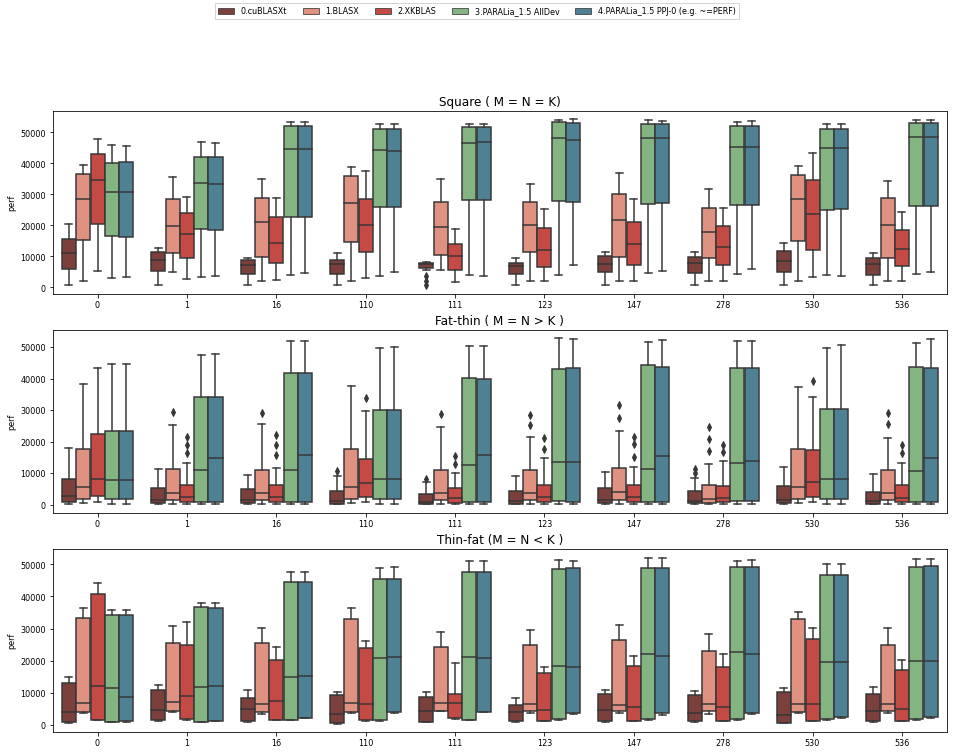

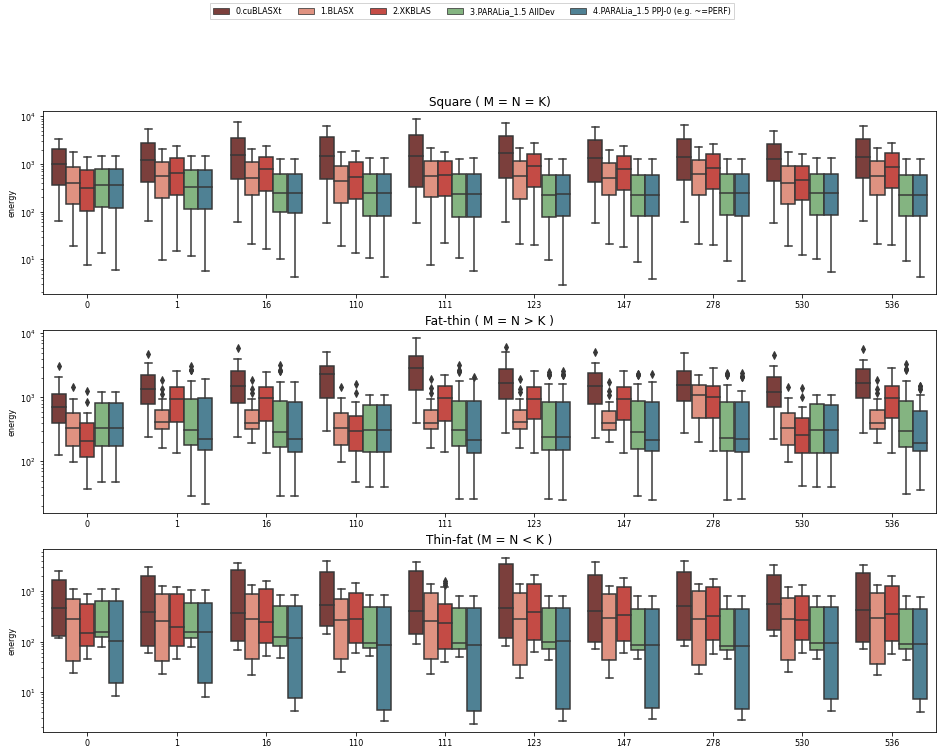

In [38]:
def CoCoPeLia_enforce_dataset_min_limits(df):
    return df.loc[((df['M']*df['N']*df['K'] >= 2048**3)) ]

sns.set_palette(cp3_2)
sns.color_palette()

CoCopeLia_all_data_alldev = pd.concat([BLASxEx_data,XKBLAS_nocache_data])
CoCopeLia_all_data_alldev = pd.concat([CoCopeLia_all_data_alldev,cuBLASXt_best_data])
CoCopeLia_all_data_alldev = pd.concat([CoCopeLia_all_data_alldev,CoCopeLia_data_allhops_02pen_ESPA_alldev])
CoCopeLia_all_data_alldev = pd.concat([CoCopeLia_all_data_alldev,CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0])
#CoCopeLia_all_data_alldev = pd.concat([CoCopeLia_all_data_alldev,CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_1]) 
#CoCopeLia_all_data_alldev = pd.concat([CoCopeLia_all_data_alldev,CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_5])
#CoCopeLia_all_data_alldev = pd.concat([CoCopeLia_all_data_alldev,CoCopeLia_data_allhops_02pen_ESPA_pred_EDP])

CoCopeLia_all_data_mean = CoCoPeLia_enforce_dataset_min_limits(CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_alldev))
#print(CoCopeLia_all_data_mean.head(5))
CoCopeLia_all_data_alldev_list = []
CoCopeLia_all_data_alldev_list.append(CoCoPeLia_select_subset(CoCopeLia_all_data_mean,'square'))
CoCopeLia_all_data_alldev_list.append(CoCoPeLia_select_subset(CoCopeLia_all_data_mean,'fat-thin'))
CoCopeLia_all_data_alldev_list.append(CoCoPeLia_select_subset(CoCopeLia_all_data_mean,'thin-fat'))
elem_name=['Square ( M = N = K)', 'Fat-thin ( M = N > K )', 'Thin-fat (M = N < K )']
fig, ax = plt.subplots(3)
fig.set_size_inches(width*4, height*5)
fig.subplots_adjust(left=.1, bottom=.06, right=.99, top=.86)
for ctr in range(0,len(ax)):
    CoCopeLia_all_data_alldev_list[ctr].sort_values(inplace = True, by = ['imp'])
    sns.boxplot(data=CoCopeLia_all_data_alldev_list[ctr], x = 'loc_str', y = 'perf', hue = 'imp', ax=ax[ctr])
    ax[ctr].set_title(elem_name[ctr])
    ax[ctr].get_legend().remove()
    #ax[ctr].set_xticks([])
    ax[ctr].set_xlabel('')
    #ax[ctr].set_xticklabels(['[-1,-1,-1]', '[0,0,-1]', '[4,2,-1]', '[-1,-1,0]', '[-1,0,5]', '[0,0,0]', '[0,1,2]', '[0,3,6]', '[4,2,5]', '[1,6,7]'])
    if ctr == 0: 
        fig.legend(loc = 'upper center',#title="Model",  # Title for the legend
            fontsize=font, fancybox = False, ncol=6)
fig.savefig('Plots/MaxDev/Plot_testbed-%s_gflops_sumup.pdf' % (machine))
fig, ax = plt.subplots(3)
fig.set_size_inches(width*4, height*5)
fig.subplots_adjust(left=.1, bottom=.06, right=.99, top=.86)
for ctr in range(0,len(ax)):
    sns.boxplot(data=CoCopeLia_all_data_alldev_list[ctr], x = 'loc_str', y = 'energy', hue = 'imp', ax=ax[ctr])
    ax[ctr].set_title(elem_name[ctr])
    ax[ctr].set_yscale('log')
    ax[ctr].get_legend().remove()
    #ax[ctr].set_xticks([])
    ax[ctr].set_xlabel('')
    #ax[ctr].set_xticklabels(['[-1,-1,-1]', '[0,0,-1]', '[4,2,-1]', '[-1,-1,0]', '[-1,0,5]', '[0,0,0]', '[0,1,2]', '[0,3,6]', '[4,2,5]', '[1,6,7]'])
    if ctr == 0: 
        fig.legend(loc = 'upper center',#title="Model",  # Title for the legend
            fontsize=font, fancybox = False, ncol=6)
fig.savefig('Plots/MaxDev/Plot_testbed-%s_Energy_sumup.pdf' % (machine))    

loc = [-1, -1, -1]
XKBLAS_nocache_data_p mean perf = 14076.697291 Gflops/s
BLASxEx_data_p mean perf = 11994.329460 Gflops/s
BLASxEx_data_p mean perf = 11994.329460 Gflops/s


/tmp/ipykernel_17150/3548385279.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  'alpha','beta','M','N','K','Asloc','Bsloc','Csloc', 'CsOutloc'], as_index=False, sort=True).mean()
/tmp/ipykernel_17150/3548385279.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  'alpha','beta','M','N','K','Asloc','Bsloc','Csloc', 'CsOutloc'], as_index=False, sort=True).mean()
/tmp/ipykernel_17150/3548385279.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should 

NameError: name 'CoCopeLia_data_nohops_alldev' is not defined

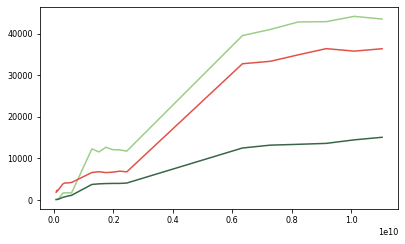

In [15]:
# Plot all, in respect to Problem size
for loc in [[-1,-1,-1], [0,0,-1], [4,2,-1], [-1,-1,0], [-1,0,5], [0,0,0], [0,1,2], [0,3,6], [4,2,5], [1,6,7]]:
    print("loc = " + str(loc))
    fig, ax = plt.subplots()
    fig.subplots_adjust(left=.16, bottom=.16, right=.99, top=.86)

    XKBLAS_nocache_data_p = CoCoPeLia_grouby_avg(CoCoPeLia_select_indata_locs(XKBLAS_nocache_data, loc[0], loc[1], loc[2]))
    XKBLAS_nocache_data_p.sort_values(inplace = True, by = ['bytes'])
    print("XKBLAS_nocache_data_p mean perf = %lf Gflops/s" % XKBLAS_nocache_data_p['perf'].mean())
    plt.plot(XKBLAS_nocache_data_p['bytes'], XKBLAS_nocache_data_p['perf'], color=cp4[0], label='XKBLAS-fair')

    BLASxEx_data_p = CoCoPeLia_grouby_avg(CoCoPeLia_select_indata_locs(BLASxEx_data, loc[0], loc[1], loc[2]))
    BLASxEx_data_p.sort_values(inplace = True, by = ['bytes'])
    print("BLASxEx_data_p mean perf = %lf Gflops/s" % BLASxEx_data_p['perf'].mean())
    plt.plot(BLASxEx_data_p['bytes'], BLASxEx_data_p['perf'], color=cp4[1], label='BLASX-buf-reuse')

    cuBLASXt_best_data_p = CoCoPeLia_grouby_avg(CoCoPeLia_select_indata_locs(cuBLASXt_best_data, loc[0], loc[1], loc[2]))
    cuBLASXt_best_data_p.sort_values(inplace = True, by = ['bytes'])
    print("BLASxEx_data_p mean perf = %lf Gflops/s" % BLASxEx_data_p['perf'].mean())
    plt.plot(dgemm_bytes(cuBLASXt_best_data_p), dgemm_flops(cuBLASXt_best_data_p)/(1e9*cuBLASXt_best_data_p['timer']),  color=cp4[2], label='cuBLASXt-best')

           
    CoCopeLia_data_nohops_alldev_p = CoCoPeLia_grouby_avg(CoCoPeLia_select_indata_locs(CoCopeLia_data_nohops_alldev, loc[0], loc[1], loc[2]))
    CoCopeLia_data_nohops_alldev_p.sort_values(inplace = True, by = ['bytes'])
    print("CoCopeLia_data_nohops_alldev_p mean perf = %lf Gflops/s" % CoCopeLia_data_nohops_alldev_p['perf'].mean())
    plt.plot(CoCopeLia_data_nohops_alldev_p['bytes'], CoCopeLia_data_nohops_alldev_p['perf'], color=cp4[3], label='CoCopeLia.1.2')

    CoCopeLia_data_rhops_02pen_alldev_p = CoCoPeLia_grouby_avg(CoCoPeLia_select_indata_locs(CoCopeLia_data_rhops_02pen_alldev, loc[0], loc[1], loc[2]))
    CoCopeLia_data_rhops_02pen_alldev_p.sort_values(inplace = True, by = ['bytes'])    
    print("CoCopeLia_data_rhops_02pen_alldev_p mean perf = %lf Gflops/s" % CoCopeLia_data_rhops_02pen_alldev_p['perf'].mean())
    plt.plot(CoCopeLia_data_rhops_02pen_alldev_p['bytes'], CoCopeLia_data_rhops_02pen_alldev_p['perf'], color='c', label='CoCopeLia.1.4 Allhops')
         
    CoCopeLia_data_allhops_02pen_alldev_p = CoCoPeLia_grouby_avg(CoCoPeLia_select_indata_locs(CoCopeLia_data_allhops_02pen_alldev, loc[0], loc[1], loc[2]))
    CoCopeLia_data_allhops_02pen_alldev_p.sort_values(inplace = True, by = ['bytes'])    
    print("CoCopeLia_data_allhops_02pen_alldev_p mean perf = %lf Gflops/s" % CoCopeLia_data_allhops_02pen_alldev_p['perf'].mean())
    plt.plot(CoCopeLia_data_allhops_02pen_alldev_p['bytes'], CoCopeLia_data_allhops_02pen_alldev_p['perf'], color='m', label='CoCopeLia.1.4 Rhops')
   
    CoCopeLia_data_allhops_02pen_ESPA_alldev_p = CoCoPeLia_grouby_avg(CoCoPeLia_select_indata_locs(CoCopeLia_data_allhops_02pen_ESPA_alldev, loc[0], loc[1], loc[2]))
    CoCopeLia_data_allhops_02pen_ESPA_alldev_p.sort_values(inplace = True, by = ['bytes'])    
    print("CoCopeLia_data_allhops_02pen_ESPA_alldev_p mean perf = %lf Gflops/s" % CoCopeLia_data_allhops_02pen_ESPA_alldev_p['perf'].mean())
    plt.plot(CoCopeLia_data_allhops_02pen_ESPA_alldev_p['bytes'], CoCopeLia_data_allhops_02pen_ESPA_alldev_p['perf'], color='b', label='CoCopeLia.1.4 ESPA')
    
    plt.grid(axis='y')
    plt.ylabel('Performance (Gflops/s)')
    plt.xlabel('Problem Size')

    #ymin, ymax = ax.get_ylim()
    xmin, xmax = ax.get_xlim()
    plt.axhline(Rmax_Gflops, linewidth = 0.5, color='b', linestyle = '--')
    plt.text(xmax - (xmax-xmin)*0.05, Rmax_Gflops*0.95, 'Peak' , fontsize = font -2, color='b')
    #plt.axvline(MemMax,color='c',linewidth = 0.5, linestyle = '--')
    #plt.text(MemMax*1.01, ymin + (ymax-ymin)*0.05, 'Combined GPU Mem', fontsize = font -2, color='c')

    plt.xscale('log')
    #fig.set_size_inches(width, height)
    fig.legend(loc = 'upper center',#title="Model",  # Title for the legend
        fontsize=font, fancybox = False, ncol=3)
    #fig.savefig('Plot-Transpose-Comparisson-%s.pdf' % machine)
    fig.savefig('Plots/MaxDev/Plot_testbed-%s_gflops_dataloc_%d_%d_%d.png' % (machine, loc[0], loc[1], loc[2]))
    fig.savefig('Plots/MaxDev/Plot_testbed-%s_gflops_dataloc_%d_%d_%d.pdf' % (machine, loc[0], loc[1], loc[2]))
    plt.close()